In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from scipy.stats import rv_histogram, norm
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
combined_data = pd.read_csv("../exp/lorenz_combined_output.csv")

In [4]:
y_cols = combined_data.columns[combined_data.columns.str.contains("Y")]
x_cols = combined_data.columns[combined_data.columns.str.contains("X")]

In [49]:
y_sum = combined_data[y_cols].sum(axis=1)
hist, x_bins, y_bins = np.histogram2d(combined_data["X_t"], y_sum, 
                                      bins=(np.linspace(combined_data["X_t"].min(), combined_data["X_t"].max(), 100),
                                            np.linspace(y_sum.min(), y_sum.max(), 50)))

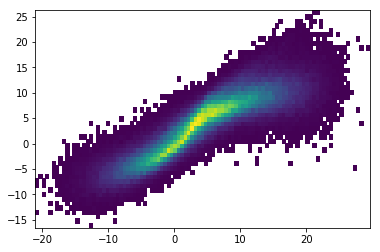

In [50]:
plt.pcolormesh(x_bins, y_bins, np.ma.array(hist.T, mask=hist.T == 0))

9.70241147822


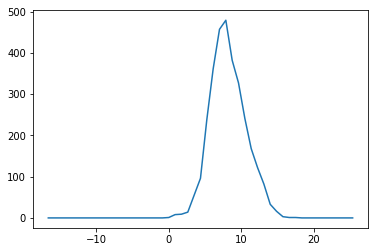

In [54]:
print(x_bins[60])
plt.plot(y_bins[:-1], hist[60])

In [56]:
hist_dist = rv_histogram((hist[60], y_bins))

In [73]:
hist_dist.ppf(0.99)

14.602863048548919

In [72]:
norm.cdf(3)

0.9986501019683699

In [77]:
np.searchsorted(x_bins, x_bins.max())

99

In [79]:
lorenz_data = xr.open_dataset("../exp/lorenz_output.nc")

In [82]:
l_y = lorenz_data["lorenz_y"][:].values

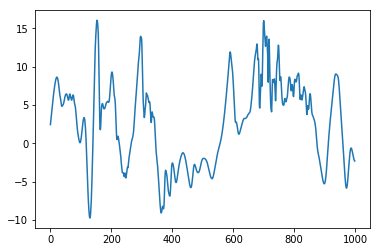

In [103]:
plt.plot(l_y[5000:6000, 0:32].sum(axis=1))

(0, 100)

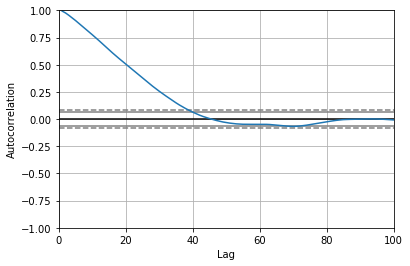

In [99]:
autocorrelation_plot(l_y[:1000, 0:32].sum(axis=1))
plt.xlim(0, 100)

In [191]:
pd.Series(l_y[:, 0:32].sum(axis=1)).autocorr(lag=1)

0.99333087055629743

In [187]:
rand_vals = np.zeros(10000)
rand_vals[0] = 1
for i in range(1, 9999):
    rand_vals[i + 1] = 0.975 * rand_vals[i] + norm.rvs(scale=0.222)

(array([   27.,    98.,   325.,  1297.,  2282.,  2564.,  2045.,  1074.,
          263.,    25.]),
 array([-3.69983268, -3.0140298 , -2.32822692, -1.64242405, -0.95662117,
        -0.27081829,  0.41498458,  1.10078746,  1.78659034,  2.47239321,
         3.15819609]),
 <a list of 10 Patch objects>)

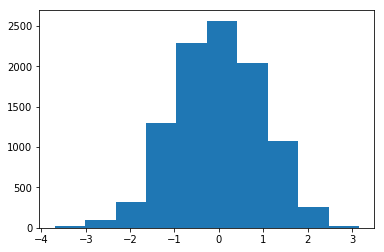

In [188]:
plt.hist(rand_vals)

In [186]:
np.sqrt(1 - 0.975 **2)

0.22220486043288984

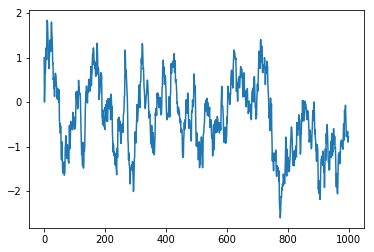

In [190]:
plt.plot(rand_vals[:1000])

In [192]:
u_sum = l_y[:, 0:32].sum(axis=1)
np.corrcoef(u_sum[0:-1], u_sum[1:])

array([[ 1.        ,  0.99333087],
       [ 0.99333087,  1.        ]])